In [1]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
from tinygp import kernels, GaussianProcess
import os 
from pathlib import Path
github_folder = str(Path(os.getcwd()).parent.parent.absolute())
print(github_folder)
file_link = github_folder + "/rfp_paper/figures/simulations/"
print(file_link)
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False

Xkernel = kernels.ExpSquared(scale=1.5)
Ykernel = kernels.ExpSquared(scale=1.5)
key = jax.random.PRNGKey(1)
fig = plt.figure(dpi=300, tight_layout=True)
for i in range(5):
    key, subkey1, subkey2 = jax.random.split(key, 3)
    gp_x = GaussianProcess(Xkernel, jnp.arange(10))
    x = gp_x.sample(subkey1)
    gp = GaussianProcess(Ykernel, x)
    y = gp.sample(subkey2)
    plt.scatter(x, y)
plt.xlabel("Feature", size=14)
plt.title("Outcome", size=14, loc='left')
fig.savefig(file_link + 'gp_data.png', format='png')
plt.show()

/Users/patrickpower/Documents/GitHub
/Users/patrickpower/Documents/GitHub/rfp_paper/figures/simulations/


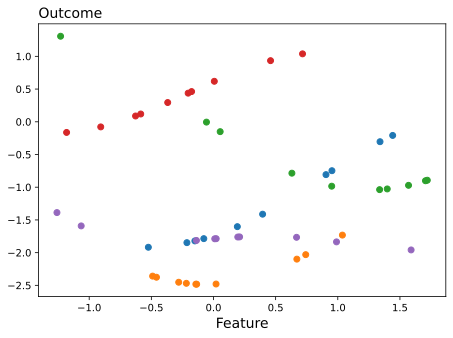